In [62]:
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from datetime import datetime

API_KEY = 'a323bc33f0a2502dc90c88572c1f6189'

In [63]:
city = 'Alexandria'
data = requests.get(f'http://api.openweathermap.org/data/2.5/forecast?q={city}&appid={API_KEY}&units=metric')
data.json()

{'cod': '200',
 'message': 0,
 'cnt': 40,
 'list': [{'dt': 1733400000,
   'main': {'temp': 19.44,
    'feels_like': 18.95,
    'temp_min': 19.44,
    'temp_max': 19.86,
    'pressure': 1020,
    'sea_level': 1020,
    'grnd_level': 1019,
    'humidity': 58,
    'temp_kf': -0.42},
   'weather': [{'id': 800,
     'main': 'Clear',
     'description': 'clear sky',
     'icon': '01d'}],
   'clouds': {'all': 1},
   'wind': {'speed': 2.76, 'deg': 340, 'gust': 1.79},
   'visibility': 10000,
   'pop': 0,
   'sys': {'pod': 'd'},
   'dt_txt': '2024-12-05 12:00:00'},
  {'dt': 1733410800,
   'main': {'temp': 19.07,
    'feels_like': 18.63,
    'temp_min': 18.99,
    'temp_max': 19.07,
    'pressure': 1019,
    'sea_level': 1019,
    'grnd_level': 1019,
    'humidity': 61,
    'temp_kf': 0.08},
   'weather': [{'id': 802,
     'main': 'Clouds',
     'description': 'scattered clouds',
     'icon': '03n'}],
   'clouds': {'all': 31},
   'wind': {'speed': 3.38, 'deg': 32, 'gust': 3.63},
   'visibility': 

In [64]:
def fetch_weather(city):
    URL = f'http://api.openweathermap.org/data/2.5/forecast?q={city}&appid={API_KEY}&units=metric'
    response = requests.get(URL)
    if response.status_code == 200:
        data = response.json()
        time = []
        temps = []
        if 'list' in data:
            for entry in data['list']:
                time.append(entry['dt_txt'])
                temps.append(entry['main']['temp'])
            return time, temps
        else:
            print(f"Error: 'list' key not found in response data for {city}.")
            return None, None
    else:
        print(f"Error: Unable to fetch data for {city}. Status code: {response.status_code}")
        return None, None



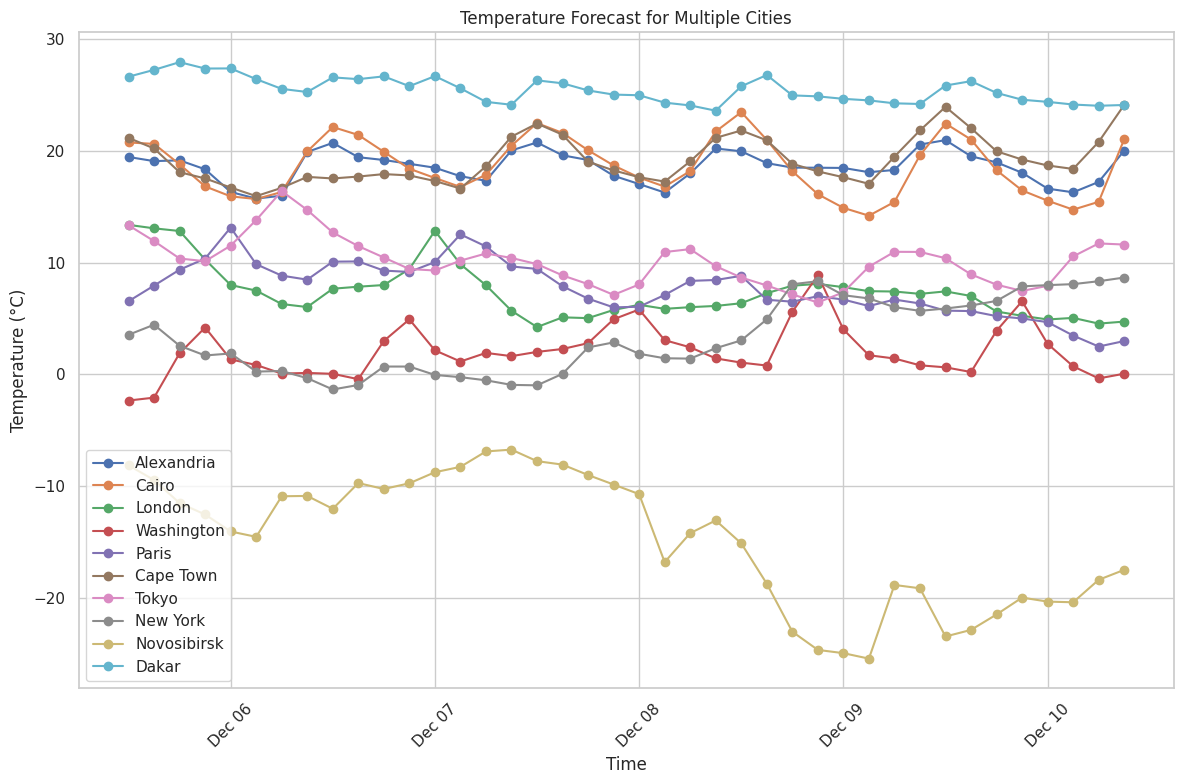

In [65]:
plt.figure(figsize=(12, 8))
# loop over each city and plot temp
for city in CITIES:
    time, temps = fetch_weather(city)
    if time and temps:
        time = [datetime.strptime(t, '%Y-%m-%d %H:%M:%S') for t in time]
        plt.plot(time, temps, marker='o', label=city)

plt.xticks(rotation=45)
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Forecast for Multiple Cities')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()

In [66]:
URL = f'http://api.openweathermap.org/data/2.5/weather?q=Egypt&appid={API_KEY}&units=metric'
response = requests.get(URL)
response.json()

{'coord': {'lon': -75.5299, 'lat': 40.6801},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 1.07,
  'feels_like': -3.05,
  'temp_min': -0.18,
  'temp_max': 2.02,
  'pressure': 999,
  'humidity': 87,
  'sea_level': 999,
  'grnd_level': 977},
 'visibility': 2816,
 'wind': {'speed': 4.12, 'deg': 270},
 'clouds': {'all': 100},
 'dt': 1733393904,
 'sys': {'type': 2,
  'id': 2002445,
  'country': 'US',
  'sunrise': 1733400677,
  'sunset': 1733434499},
 'timezone': -18000,
 'id': 5188351,
 'name': 'Egypt',
 'cod': 200}

Error: Unable to fetch data for South Africa. Status code: 404


<ipython-input-67-76b9f618b439>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=weather_conditions, palette="Set2", order=sorted(set(weather_conditions)))


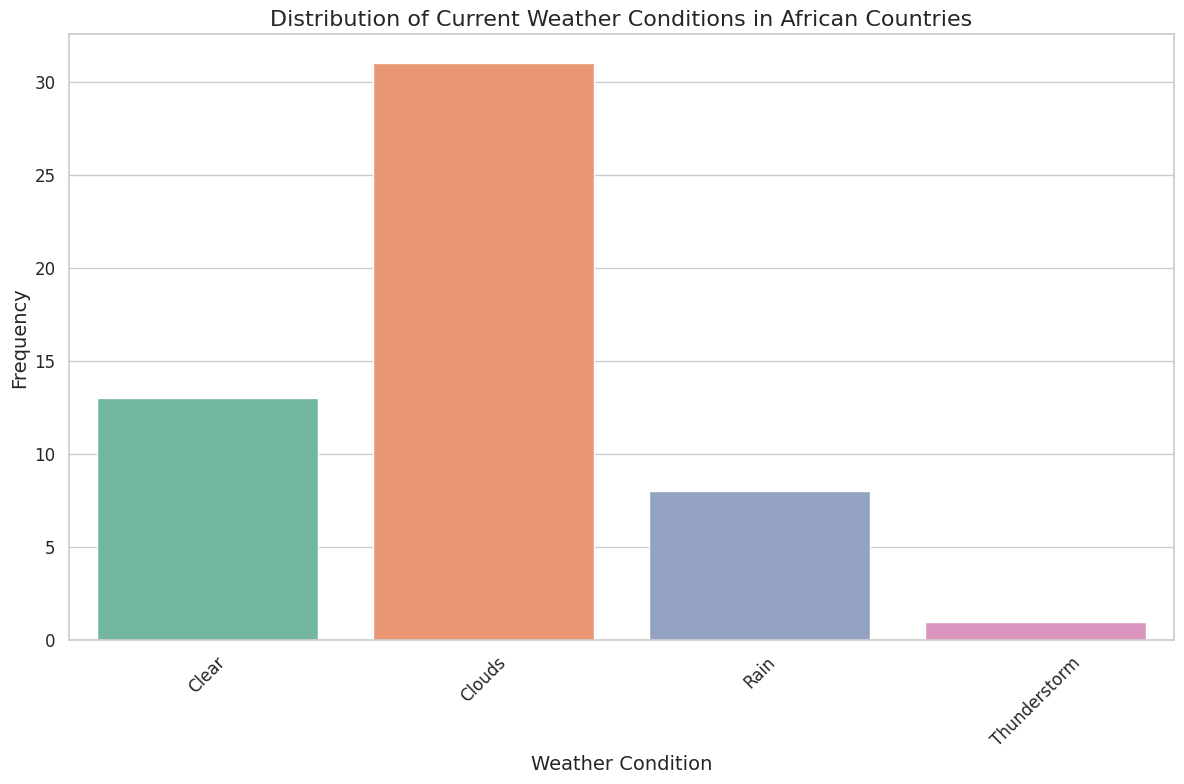

In [67]:
AFRICAN_COUNTRIES = [
    'Nigeria', 'Ethiopia', 'Egypt', 'DR Congo', 'Tanzania', 'South Africa', 'Kenya', 'Sudan', 'Uganda', 'Algeria',
    'Morocco', 'Angola', 'Mozambique', 'Ghana', 'Madagascar', 'Côte d\'Ivoire', 'Cameroon', 'Niger', 'Mali', 'Burkina Faso',
    'Malawi', 'Zambia', 'Chad', 'Somalia', 'Senegal', 'Zimbabwe', 'Guinea', 'Benin', 'Rwanda', 'Burundi', 'Tunisia',
    'South Sudan', 'Togo', 'Sierra Leone', 'Libya', 'Congo', 'Liberia', 'Central African Republic', 'Mauritania', 'Eritrea',
    'Namibia', 'Gambia', 'Gabon', 'Botswana', 'Lesotho', 'Guinea-Bissau', 'Equatorial Guinea', 'Mauritius', 'Eswatini',
    'Djibouti', 'Comoros', 'Cabo Verde', 'Sao Tome & Principe', 'Seychelles'
]

def fetch_weather_condition(country):
    URL = f'http://api.openweathermap.org/data/2.5/weather?q={country}&appid={API_KEY}&units=metric'
    response = requests.get(URL)
    if response.status_code == 200:
        data = response.json()
        if 'weather' in data:
            weather_condition = data['weather'][0]['main']
            return weather_condition
        else:
            print(f"Error: 'weather' key not found in response data for {country}.")
            return None
    else:
        print(f"Error: Unable to fetch data for {country}. Status code: {response.status_code}")
        return None

weather_conditions = []

# loop over each country and get  weather condition
for country in AFRICAN_COUNTRIES:
    condition = fetch_weather_condition(country)
    if condition:
        weather_conditions.append(condition)

sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
ax = sns.countplot(x=weather_conditions, palette="Set2", order=sorted(set(weather_conditions)))

plt.xlabel('Weather Condition', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Current Weather Conditions in African Countries', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

